In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import train and test datasets

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Step 1: Checking distribution of the data

### Train dataset

In [3]:
len(train)

891

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Check column type
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Survived

- Survived = 1
- No Survived = 0

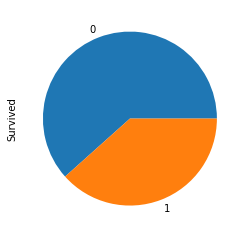

In [8]:
train.Survived.value_counts().plot.pie()

#### Pclass

- 1 = 1st
- 2 = 2nd 
- 3 = 3rd

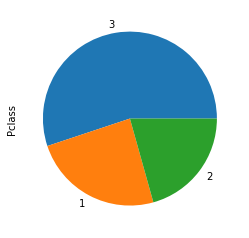

In [9]:
train.Pclass.value_counts().plot.pie()

#### Name

In [10]:
name = train.Name.iloc[0]
name

'Braund, Mr. Owen Harris'

In [11]:
name.split(',')[0]

'Braund'

In [12]:
train['last_name'], train['first_name'] = train['Name'].str.split(',', 0).str

In [13]:
# train.last_name.value_counts()

In [14]:
train[['first_name']].head()

,first_name
0,Mr. Owen Harris
1,Mrs. John Bradley (Florence Briggs Thayer)
2,Miss. Laina
3,Mrs. Jacques Heath (Lily May Peel)
4,Mr. William Henry


In [15]:
train['treatment'], train['first_name_w_treatment'] = train['first_name'].str.split('.', 1).str

In [16]:
train['name_w_nickname'], train['nickname'] = train['Name'].str.split('\(', 1).str

In [17]:
# remove last caracter from nickname column
train['nickname'] = train.nickname.str.rstrip('\)')

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,first_name,treatment,first_name_w_treatment,name_w_nickname,nickname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Mr,Owen Harris,"Braund, Mr. Owen Harris",NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,John Bradley (Florence Briggs Thayer),"Cumings, Mrs. John Bradley",Florence Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Miss,Laina,"Heikkinen, Miss. Laina",NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,Jacques Heath (Lily May Peel),"Futrelle, Mrs. Jacques Heath",Lily May Peel
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Mr,William Henry,"Allen, Mr. William Henry",NaN


In [19]:
df_Name = train[train['Name'].str.contains("\(")==True]
df_Name.Survived.value_counts()

1    110
0     33
Name: Survived, dtype: int64

In [20]:
len(df_Name)/len(train)

0.16049382716049382

In [21]:
train = train.drop(['Name','first_name_w_treatment','first_name','name_w_nickname'], 1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,treatment,nickname
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,Florence Briggs Thayer
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Lily May Peel
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,NaN


#### Sex

In [23]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Convert string to number:
- female: 1
- male: 0

In [24]:
train.loc[train.Sex=='female',['Sex']] = 1
train.loc[train.Sex=='male',['Sex']] = 0

In [25]:
train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

#### Age

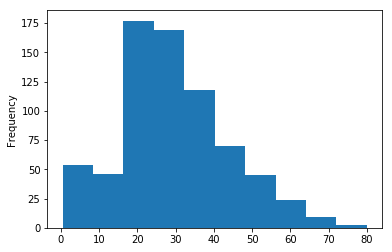

In [26]:
train['Age'].plot.hist()

Age
0.42     AxesSubplot(0.125,0.125;0.775x0.755)
0.67     AxesSubplot(0.125,0.125;0.775x0.755)
0.75     AxesSubplot(0.125,0.125;0.775x0.755)
0.83     AxesSubplot(0.125,0.125;0.775x0.755)
0.92     AxesSubplot(0.125,0.125;0.775x0.755)
1.00     AxesSubplot(0.125,0.125;0.775x0.755)
2.00     AxesSubplot(0.125,0.125;0.775x0.755)
3.00     AxesSubplot(0.125,0.125;0.775x0.755)
4.00     AxesSubplot(0.125,0.125;0.775x0.755)
5.00     AxesSubplot(0.125,0.125;0.775x0.755)
6.00     AxesSubplot(0.125,0.125;0.775x0.755)
7.00     AxesSubplot(0.125,0.125;0.775x0.755)
8.00     AxesSubplot(0.125,0.125;0.775x0.755)
9.00     AxesSubplot(0.125,0.125;0.775x0.755)
10.00    AxesSubplot(0.125,0.125;0.775x0.755)
11.00    AxesSubplot(0.125,0.125;0.775x0.755)
12.00    AxesSubplot(0.125,0.125;0.775x0.755)
13.00    AxesSubplot(0.125,0.125;0.775x0.755)
14.00    AxesSubplot(0.125,0.125;0.775x0.755)
14.50    AxesSubplot(0.125,0.125;0.775x0.755)
15.00    AxesSubplot(0.125,0.125;0.775x0.755)
16.00    AxesSubplot(0.125,0.1

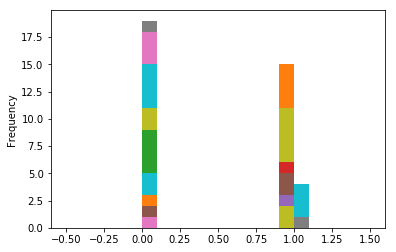

In [27]:
train.groupby(['Age'])['Survived'].plot.hist()

In [28]:
# use cut function from pandas

In [29]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
t = train.loc[train.nickname.isna()]
t.Survived.value_counts()
232/516

0.4496124031007752

In [31]:
bins = [0, 14, 24, 31, 41, 81]
labels = [1,2,3,4,5]
train['age_group'] = pd.cut(train['Age'], bins=bins, labels=labels)

#train.cut(train.Age, [0,80]

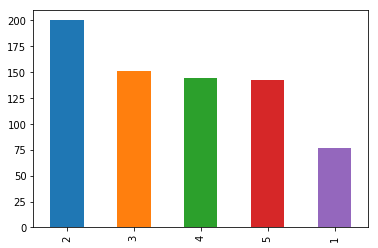

In [32]:
train.age_group.value_counts().plot.bar()

age_group
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

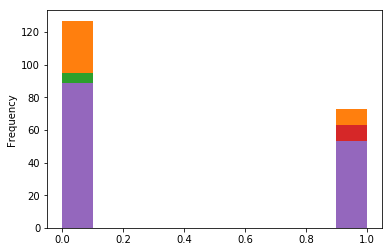

In [33]:
train.groupby(['age_group'])['Survived'].plot.hist()

In [34]:
len(train.loc[(train.Age>0)&(train.Age<=13)]), len(train.loc[(train.Age>13)&(train.Age<=23)]), len(train.loc[(train.Age>23)&(train.Age<=30)]), len(train.loc[(train.Age>30)&(train.Age<=40)]), len(train.loc[(train.Age>40)&(train.Age<=80)]), len(train)


#, len(train.loc[(train.Age>34)&(train.Age<=48)]), len(train.loc[(train.Age>48)&(train.Age<=60)]), len(train.loc[train.Age>60]), len(train)

(71, 175, 163, 155, 150, 891)

In [35]:
train.Age.isna().sum()

177

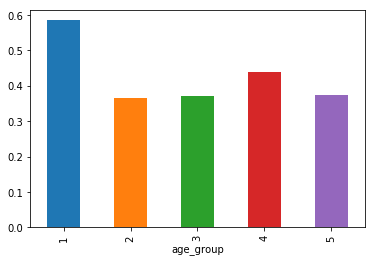

In [36]:
train.groupby('age_group').Survived.mean().plot.bar()

In [37]:
# train.groupby(['age_group']).sum().Survived.sort_values(ascending=False).plot.bar()

In [38]:
train.age_group.value_counts()

2    200
3    151
4    144
5    142
1     77
Name: age_group, dtype: int64

In [39]:
# teste = pd.DataFrame(train.groupby(['Age'])["Survived"])

### SibSp

In [41]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

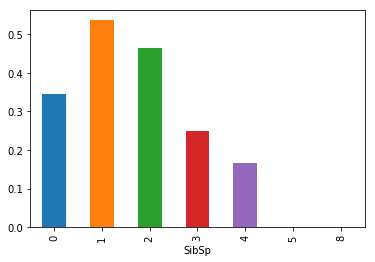

In [44]:
train.groupby('SibSp').Survived.mean().plot.bar()

#### Parch

In [46]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

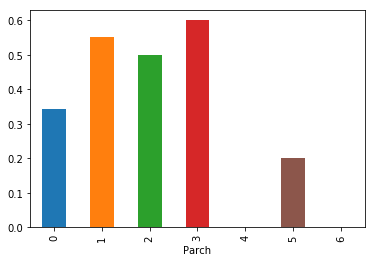

In [47]:
train.groupby('Parch').Survived.mean().plot.bar()

### Ticket

In [54]:
t = train.loc[train.Ticket=='CA. 2343']
t.Survived.value_counts()

0    7
Name: Survived, dtype: int64

In [55]:
train.last_name.value_counts().head()

Andersson    9
Sage         7
Goodwin      6
Johnson      6
Skoog        6
Name: last_name, dtype: int64

#### Fare

In [78]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [82]:
train.Fare.nunique()

248

In [101]:
bins = [0, 100, 200, 350, 513]
labels = [1,2,3,4]
train['fare_group'] = pd.cut(train['Fare'], bins=bins, labels=labels)
#train.fare_group.value_counts().plot.bar()

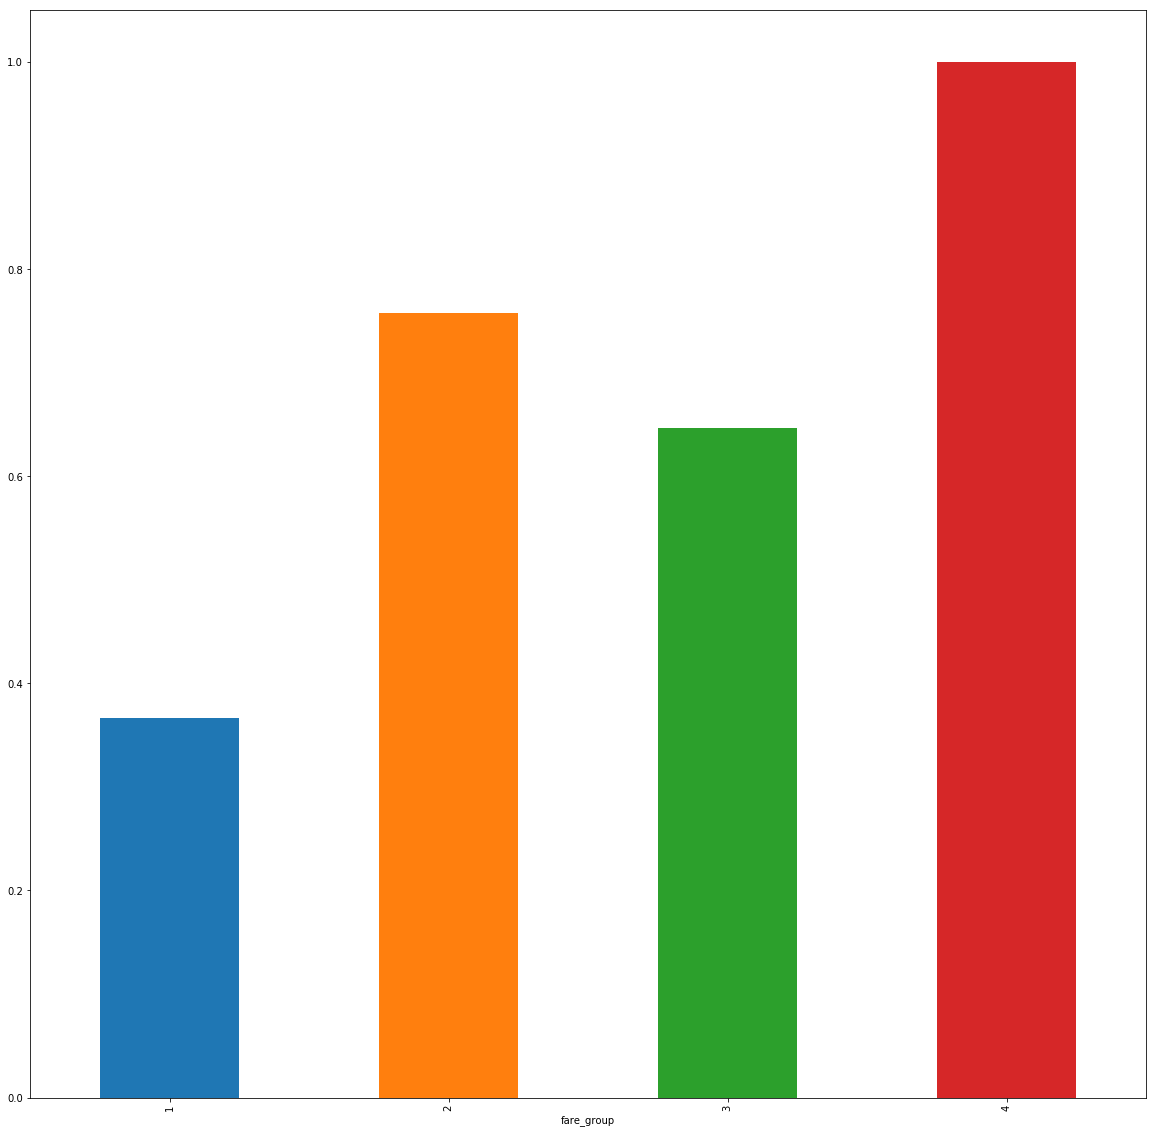

In [100]:
train.groupby('fare_group').Survived.mean().plot.bar()

In [102]:
# tt = train.groupby('Fare').Survived.mean()#.plot.bar()
# type(tt)
# #plt.rcParams['figure.figsize'] = [20, 20]
# tt.sort_values(ascending=False).plot.bar()

#### Cabin

In [103]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
F2             3
E101           3
F33            3
D              3
E33            2
D20            2
F G73          2
C126           2
B35            2
E67            2
D26            2
B18            2
C2             2
C83            2
E24            2
E44            2
C124           2
D33            2
B49            2
E8             2
C93            2
E121           2
C68            2
C65            2
C92            2
C123           2
              ..
D15            1
B102           1
E58            1
B86            1
E50            1
C70            1
C110           1
C45            1
C101           1
D6             1
D45            1
C7             1
A16            1
C91            1
B71            1
A5             1
C30            1
C32            1
C85            1
C54            1
D7             1
E40            1
E34            1
C90            1
E49            1
A32            1
D56            1
A7            

In [119]:
cabin_a = train[train['Cabin'].str.contains("A")==True]
cabin_b = train[train['Cabin'].str.contains("B")==True]
cabin_c = train[train['Cabin'].str.contains("C")==True]
cabin_d = train[train['Cabin'].str.contains("D")==True]
cabin_e = train[train['Cabin'].str.contains("E")==True]
cabin_f = train[train['Cabin'].str.contains("F")==True]
cabin_g = train[train['Cabin'].str.contains("G")==True]

In [130]:
train.loc[train['Cabin'].str.contains("A")==True]

15

In [120]:
len(cabin_a) + len(cabin_b) + len(cabin_c) + len(cabin_c) + len(cabin_d) + len(cabin_e) + len(cabin_f) + len(cabin_g)

266

In [127]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [124]:
train.Cabin.isna().sum()

687

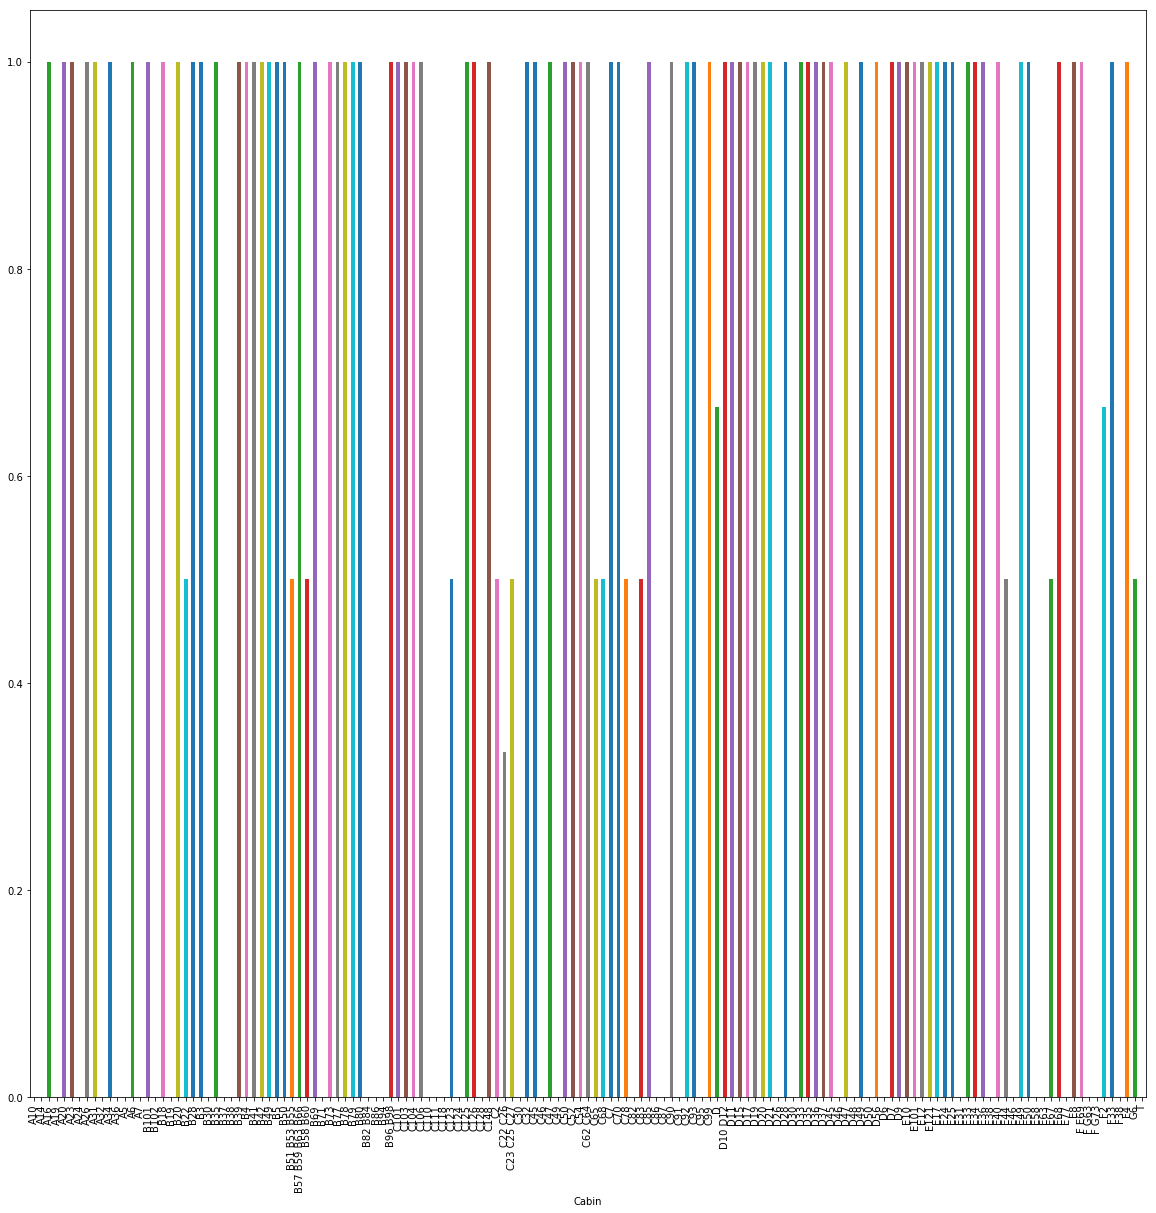

In [108]:
train.groupby('Cabin').Survived.mean().plot.bar()

In [45]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'last_name', 'treatment',
       'nickname', 'age_group'],
      dtype='object')

#### Test dataset

In [ ]:
test.describe()

In [ ]:
# Check column type
test.dtypes

In [ ]:
test.isna().sum()